As we all know importance of NPK in soil, so depending on different parameters such as N, P, K, temperature , humidity, pH , rainfall this is predixting the suitable crop for growing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#lets import our dataset
df = pd.read_csv('Crop_recommendation.csv')

In [3]:
# lets see first five rows of our dataset
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
# lets see last five rows of our dataframe
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
# Unique values from the label column i.e/ crops name
unique = df['label'].unique()
unique

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
#Let's check shape(rowsxcolumns)
df.shape

(2200, 8)

In [7]:
# checking the variation of our independent variabls for each crop, i.e. we have 1000 different samples N,P,K, yemperature,humidity,pH, rainfall for each crop
df['label'].value_counts()

grapes         100
watermelon     100
pomegranate    100
rice           100
coconut        100
mothbeans      100
chickpea       100
muskmelon      100
banana         100
coffee         100
jute           100
mango          100
maize          100
apple          100
blackgram      100
mungbean       100
orange         100
papaya         100
kidneybeans    100
lentil         100
cotton         100
pigeonpeas     100
Name: label, dtype: int64

In [8]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
#Grouping by 'Label' for mean values
avg_req = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall','label']].groupby('label').mean()
print('\n WE can see here the average soil content for each crop')
avg_req.reset_index(inplace = True)
avg_req


 WE can see here the average soil content for each crop


,label,N,P,K,temperature,humidity,ph,rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


In [10]:
few = avg_req.head(8)
u = few['label'].unique()
u

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes'], dtype=object)

Text(0.5, 1.0, 'Average N-P-K Requirement for crops')

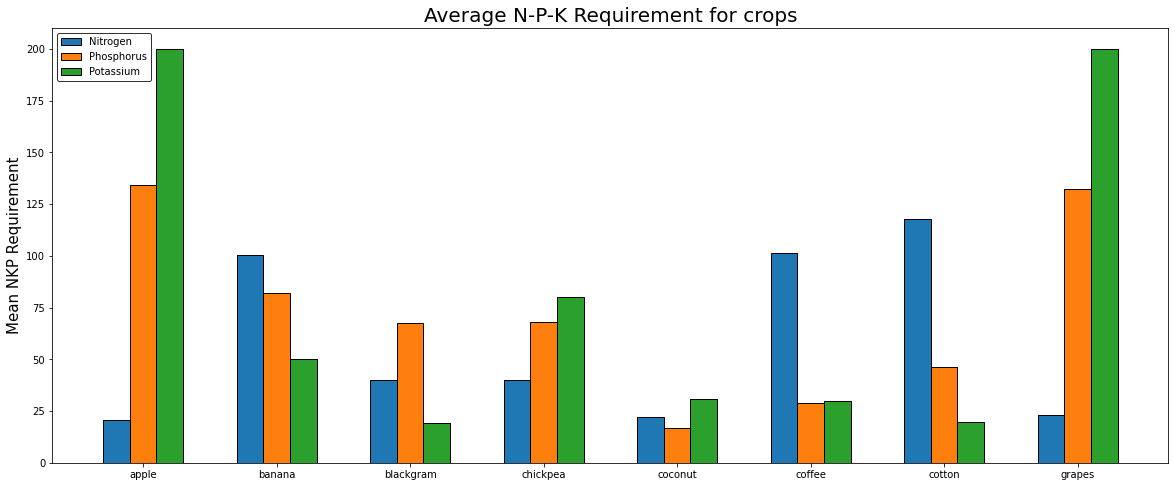

In [11]:
plt.figure(figsize=(20,8))
sec = np.arange(len(u))

plt.xticks(sec, u)

#get the values
n = few['N'].values
p = few['P'].values
k = few['K'].values

#create a bar plot
plt.bar(sec-0.2,n,width=0.2,label='Nitrogen', edgecolor ='k')
plt.bar(sec,p,width=0.2,label='Phosphorus', edgecolor='k')
plt.bar(sec+0.2,k,width=0.2,label='Potassium', edgecolor='k')
plt.ylabel('Mean NKP Requirement',fontsize=15)
plt.legend(edgecolor='k')
plt.title('Average N-P-K Requirement for crops',fontsize=20)

In above bar graph we can see the average requirement of nitrogen , phosphorus and potassium for few crops of our dataset

Text(0.5, 1.0, 'Crops VS pH')

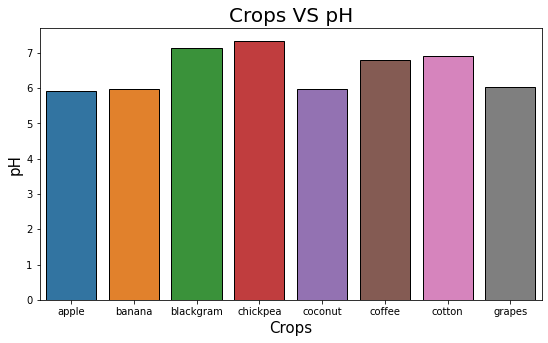

In [12]:
#pH values for some of the crops showing with the help of bar ghraph

plt.figure(figsize=(9,5))

x = few['ph'].values
y = few['label'].values

sns.barplot(y,x,edgecolor='k')
plt.xlabel('Crops',fontsize=15)
plt.ylabel('pH',fontsize=15)
plt.title('Crops VS pH', fontsize=20)

In [13]:
cotton = avg_req.iloc[6]
cotton.reset_index
cotton.keys

<bound method Series.keys of label           cotton
N               117.77
P                46.24
K                19.56
temperature     23.989
humidity       79.8435
ph             6.91268
rainfall        80.398
Name: 6, dtype: object>

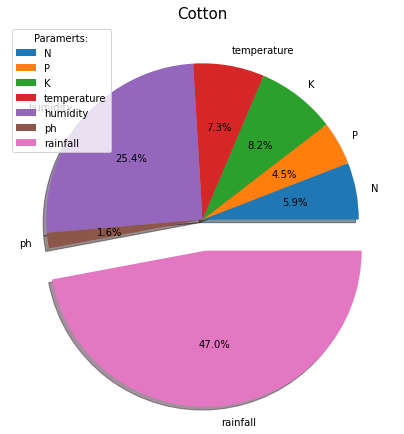

In [14]:
y = np.array([21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646])
mylabels = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
rain=[0,0,0,0,0,0,0.2]
plt.figure(figsize=(7,8))
plt.pie(y, labels = mylabels, shadow=True, autopct='%1.1f%%',explode=rain)
plt.legend(title='Paramerts:')
plt.title('Cotton',fontsize=15)
plt.show()

Here we can say rainfall is most important factor for cotton crop production

In [15]:
'rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'

IndentationError: unexpected indent (<ipython-input-15-326a35458ed3>, line 2)

In [ ]:
plt.figure(figsize=(7,8))
data = 

plt.pie(data,  shadow=True, autopct='%1.1f%%',explode=rain)
plt.legend(title='Paramerts:')
plt.title('Cotton',fontsize=15)
plt.show()

In [ ]:
#ckeking the correlation
df.corr()

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='gist_yarg')
print('In this heatmap we can see that phosphorus and potassium are directly proportional, which means phosphorus and \npotassium are most requred elemnts in soil for better growth of crops')

### Building model
#### Random forest classifier

In [ ]:
#saperating the dependent and independent variables
features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

In [ ]:
#Trainig the model
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=2)

In [ ]:
#This is multiclass classification 
#fit the train model with random forest classifier
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20,random_state=0)
RF.fit(xtrain, ytrain)

predicted_values = RF.predict(xtest)

x=metrics.accuracy_score(ytest, predicted_values)*100
print("RF's Accuracy is: ", x,'%')

print('\nclassification_report')
print(classification_report(ytest, predicted_values))

In [ ]:
xtrain

In [ ]:
RF.predict([[50,34,34,23,77,7.5,100]])

#### Saving the trained model


In [ ]:
import pickle
#Dump the train model
fn='crop_recomend.pkl'
pickle.dump(RF,open(fn,'wb'))

Loading The model using pickle.load

In [ ]:
#Loading the trained model
CR =pickle.load(open('crop_recomend.pkl','rb'))

In [ ]:
CR.predict([[100,14,34,23,77,7.5,100]])[0]